In [72]:
import mdtraj as md
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import pandas as pd


https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [23]:
pdb = './ABL1.pdb'
trajectory = './ABL1.dcd'
outdir = './output'
if not os.path.exists('outdir'):
    os.makedirs('outdir')

print("outdir:", outdir)
print("pdb:", pdb)
print("trjaectory:", trajectory)


outdir: ./output
pdb: ./ABL1.pdb
trjaectory: ./ABL1.dcd


In [24]:
trj = md.load(trajectory, top=pdb, stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames = trj.n_frames


In [25]:
nres = []
for res in trj.topology.residues:
    nres.append(res.resSeq)
sequence = (' %s' % [residue for residue in trj.topology.residues])
resname = (' %s' % [residue.name for residue in trj.topology.residues])
resindex = (' %s' % [residue.index for residue in trj.topology.residues])
res_num = (' %s' % [residue.resSeq for residue in trj.topology.residues])

#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [26]:
residue_num = []
for res in top.residues:
    residue_num.append(res.resSeq)
residue_id = np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [27]:
import nglview as nv

view = nv.show_mdtraj(trj)
view.clear_representations()
view.add_cartoon('not hydrogen', color='blue')
view.add_surface(opacity=0.3)

view

NGLWidget(max_frame=3999)

In [28]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp = md.compute_dssp(trj, simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [29]:
print(dssp.shape)
print("Rows:", len(dssp))
print("Columns:", len(dssp[0]))

#Print out helix and beta residues for a given frame
frame = 0
dssp_frame = np.column_stack((residue_id, dssp[frame]))
helix_res = np.where(dssp_frame[:, 1] == 'H')
beta_res = np.where(dssp_frame[:, 1] == 'E')
print('helical residues:', dssp_frame[helix_res])
print('beta residues:', dssp_frame[beta_res])


(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(350.0, 400.0)

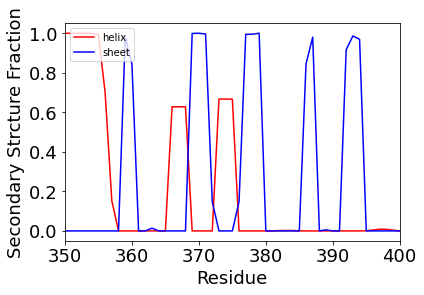

In [30]:
def dssp_convert(dssp):
    dsspH = np.copy(dssp)
    dsspE = np.copy(dssp)
    dsspH[dsspH == 'H'] = 1
    dsspH[dsspH == 'E'] = 0
    dsspH[dsspH == 'C'] = 0
    dsspH[dsspH == 'NA'] = 0
    dsspH = dsspH.astype(int)
    TotalH = np.sum(dsspH, axis=1)
    Hprop = np.sum(dsspH, axis=0).astype(float) / len(dsspE)

    dsspE[dsspE == 'H'] = 0
    dsspE[dsspE == 'E'] = 1
    dsspE[dsspE == 'C'] = 0
    dsspE[dsspE == 'NA'] = 0
    dsspE = dsspE.astype(int)
    TotalE = np.sum(dsspE, axis=1)
    Eprop = np.sum(dsspE, axis=0).astype(float) / len(dsspE)
    return Hprop, Eprop


Hprop, Eprop = dssp_convert(dssp)
plt.plot(residue_num, Hprop, c='r', label='helix')
plt.plot(residue_num, Eprop, c='b', label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350, 400)


***HOMEWORK***

Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame in VMD

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

In [62]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full = md.compute_dssp(trj, simplified=False)

def dssp_convert_full(dssp):
    dsspH = np.copy(dssp)
    dsspE = np.copy(dssp)
    dsspB = np.copy(dssp)
    dsspG = np.copy(dssp)
    dsspI = np.copy(dssp)
    dsspT = np.copy(dssp)
    dsspS = np.copy(dssp)
    dsspLoop = np.copy(dssp)

    dsspH[dsspH == 'H'] = 1
    dsspH[dsspH != '1'] = 0
    dsspH = dsspH.astype(int)
    Hprop = np.sum(dsspH, axis=0).astype(float) / len(dsspH)

    dsspE[dsspE == 'E'] = 1
    dsspE[dsspE != '1'] = 0
    dsspE = dsspE.astype(int)
    Eprop = np.sum(dsspE, axis=0).astype(float) / len(dsspE)
    
    dsspB[dsspB == 'B'] = 1
    dsspB[dsspB != '1'] = 0
    dsspB = dsspB.astype(int)
    Bprop = np.sum(dsspB, axis=0).astype(float) / len(dsspB)

    dsspG[dsspG == 'G'] = 1
    dsspG[dsspG != '1'] = 0
    dsspG = dsspG.astype(int)
    Gprop = np.sum(dsspG, axis=0).astype(float) / len(dsspG)
    
    dsspI[dsspI == 'I'] = 1
    dsspI[dsspI != '1'] = 0
    dsspI = dsspI.astype(int)
    Iprop = np.sum(dsspI, axis=0).astype(float) / len(dsspI)

    dsspT[dsspT == 'T'] = 1
    dsspT[dsspT != '1'] = 0
    dsspT = dsspT.astype(int)
    Tprop = np.sum(dsspT, axis=0).astype(float) / len(dsspT)
    
    dsspS[dsspS == 'S'] = 1
    dsspS[dsspS != '1'] = 0
    dsspS = dsspS.astype(int)
    Sprop = np.sum(dsspS, axis=0).astype(float) / len(dsspS)

    dsspLoop[dsspLoop == ' '] = 1
    dsspLoop[dsspLoop != '1'] = 0
    dsspLoop = dsspLoop.astype(int)
    Lprop = np.sum(dsspLoop, axis=0).astype(float) / len(dsspLoop)
    return Hprop, Eprop, Bprop, Gprop, Iprop, Tprop, Sprop, Lprop

Hprop, Eprop, Bprop, Gprop, Iprop, Tprop, Sprop, Lprop = dssp_convert_full(dssp_full)


In [71]:
print(Hprop.shape)

(252,)


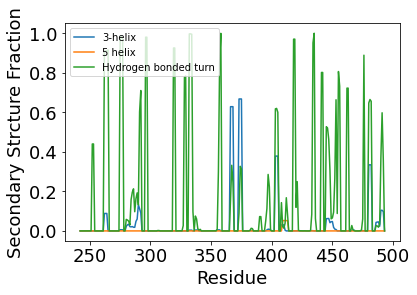

In [66]:
plt.plot(residue_num, Gprop, label = '3-helix')
plt.plot(residue_num, Iprop, label = '5 helix')
plt.plot(residue_num, Tprop, label = 'Hydrogen bonded turn')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


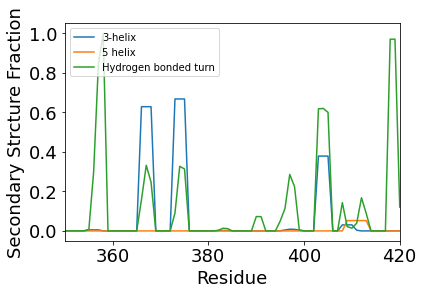

In [68]:
plt.plot(residue_num, Gprop, label = '3-helix')
plt.plot(residue_num, Iprop, label = '5 helix')
plt.plot(residue_num, Tprop, label = 'Hydrogen bonded turn')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350,420)
plt.show()

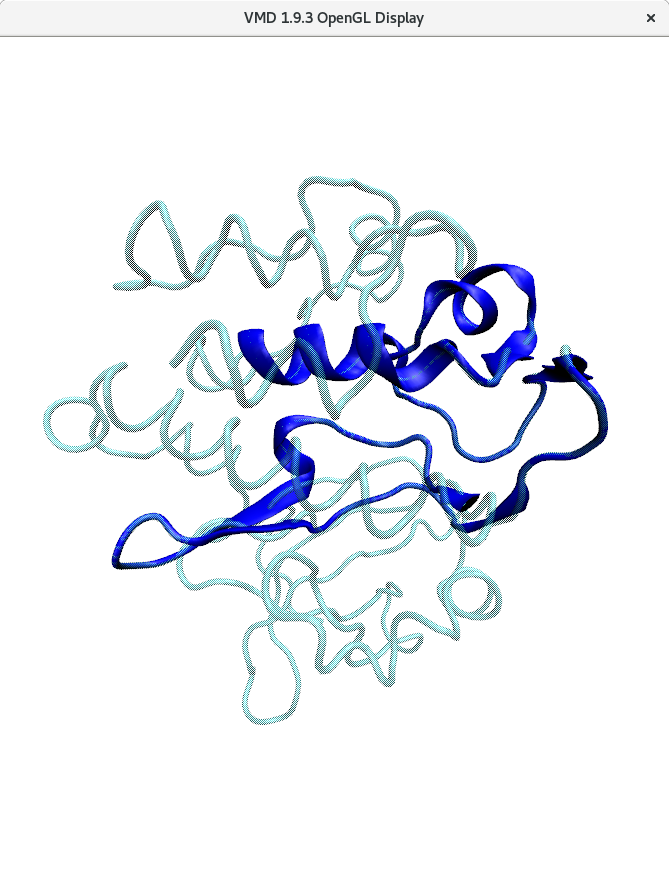

In [69]:
from IPython.display import Image
Image(filename='snapshot.png')

In [91]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type
row_names = ['H', 'E', 'B', 'G', 'I', 'T', 'S', 'Loop']
dssp_df = pd.DataFrame(columns = row_names)
dssp_df['H'] = Hprop.tolist()
dssp_df['E'] = Eprop.tolist()
dssp_df['B'] = Bprop.tolist()
dssp_df['G'] = Gprop.tolist()
dssp_df['I'] = Iprop.tolist()
dssp_df['T'] = Tprop.tolist()
dssp_df['S'] = Sprop.tolist()
dssp_df['Loop'] = Lprop.tolist()
# dssp_df = dssp_df.T
dssp_df


,H,E,B,G,I,T,S,Loop
0,0.0000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,1.00000
1,0.0000,0.53700,0.0,0.00000,0.0,0.00000,0.00000,0.46300
2,0.0000,0.86750,0.0,0.00000,0.0,0.00000,0.00350,0.12900
3,0.0000,0.86775,0.0,0.00000,0.0,0.00000,0.04225,0.09000
4,0.0000,0.93075,0.0,0.00000,0.0,0.00000,0.04950,0.01975
...,...,...,...,...,...,...,...,...
247,0.9315,0.00000,0.0,0.02375,0.0,0.03475,0.00800,0.00200
248,0.5020,0.00000,0.0,0.10425,0.0,0.37175,0.02200,0.00000
249,0.2725,0.00000,0.0,0.10425,0.0,0.59725,0.02525,0.00075
250,0.1510,0.00000,0.0,0.09825,0.0,0.35425,0.00000,0.39650


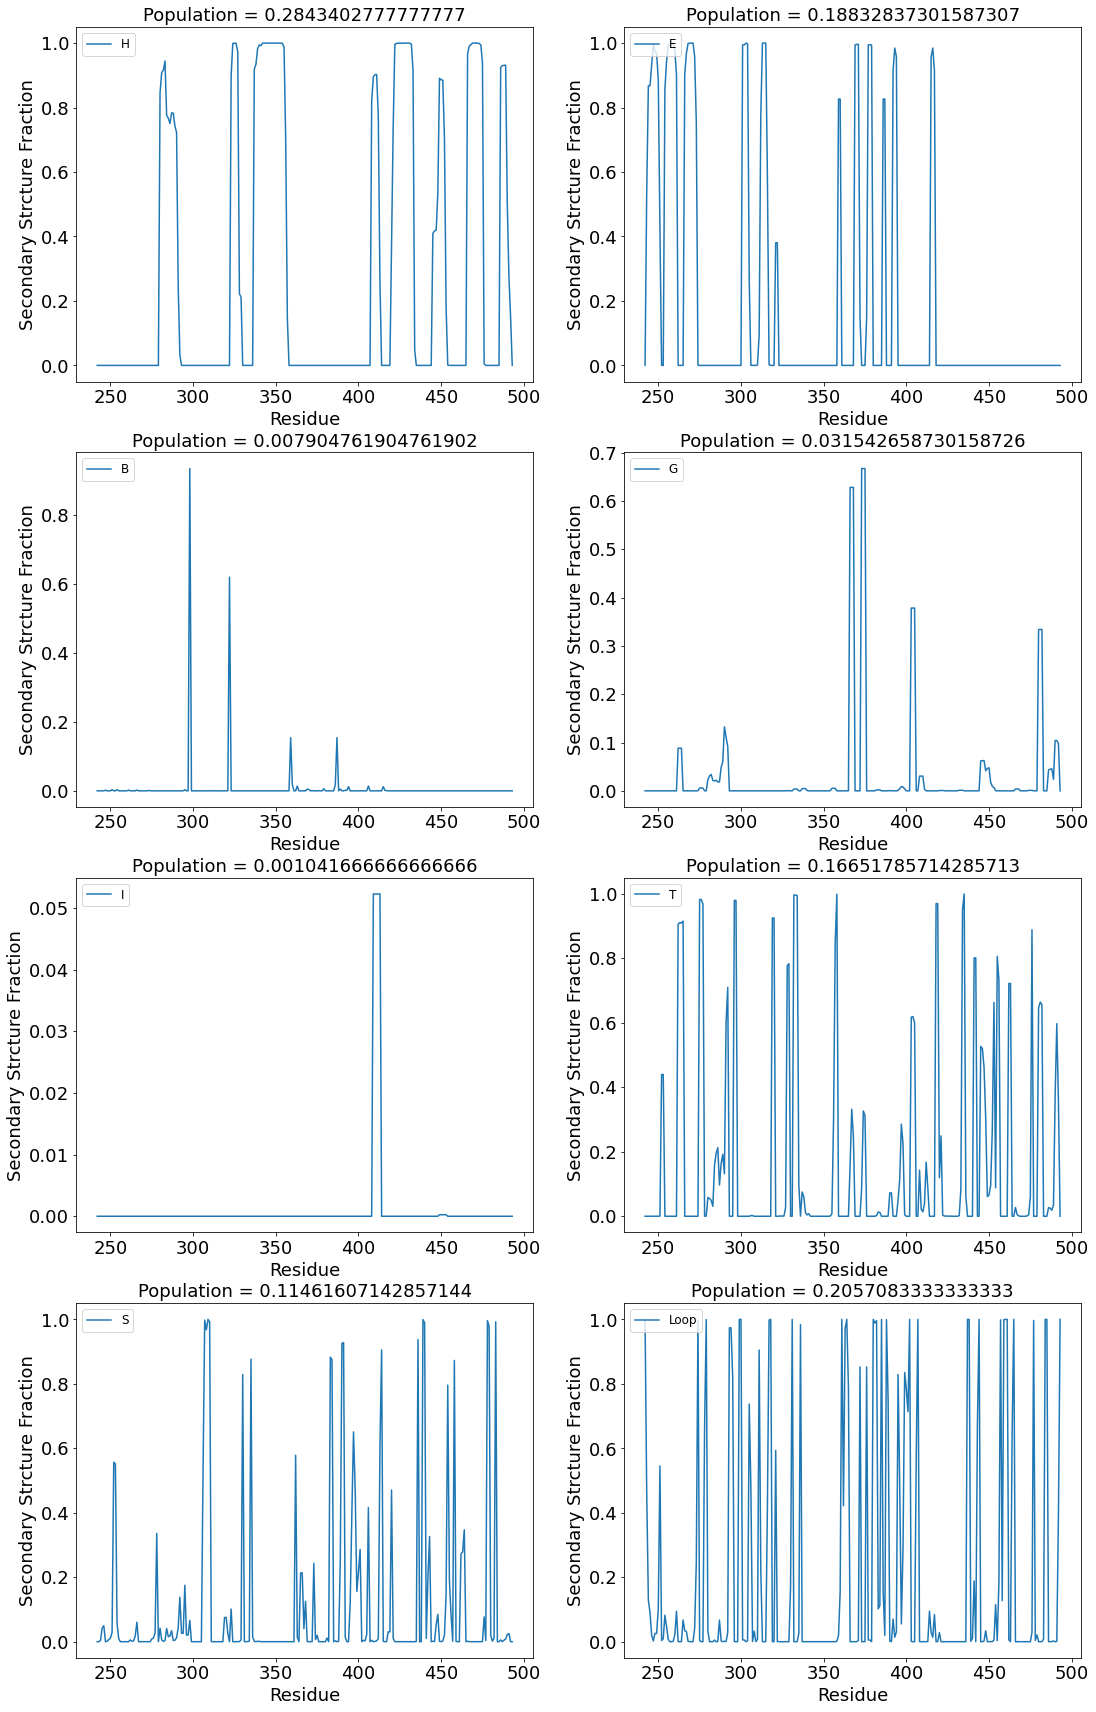

In [119]:
fig,ax = plt.subplots(4,2, figsize = (18,30))
index = 0
for i in row_names:
    population = dssp_df[i].mean()
    ax[int(index/2), index%2].plot(residue_num, dssp_df[i], label = i)
    ax[int(index/2), index%2].legend(loc = 'upper left', fontsize = 12)
    ax[int(index/2), index%2].set_xlabel('Residue', size=18)
    ax[int(index/2), index%2].set_ylabel('Secondary Strcture Fraction', size=18)
    ax[int(index/2), index%2].tick_params(labelsize=18)
    ax[int(index/2), index%2].set_title('Population = ' + str(population), fontsize = 18)
    index += 1



In [123]:
dssp_df_T = dssp_df.T
print(dssp_df_T)


      0      1       2        3        4        5        6       7        8    \
H     0.0  0.000  0.0000  0.00000  0.00000  0.00000  0.00000  0.0000  0.00000   
E     0.0  0.537  0.8675  0.86775  0.93075  0.99575  0.97300  0.9680  0.88500   
B     0.0  0.000  0.0000  0.00000  0.00000  0.00175  0.00000  0.0000  0.00000   
G     0.0  0.000  0.0000  0.00000  0.00000  0.00000  0.00000  0.0000  0.00000   
I     0.0  0.000  0.0000  0.00000  0.00000  0.00000  0.00000  0.0000  0.00000   
T     0.0  0.000  0.0000  0.00000  0.00000  0.00000  0.00000  0.0000  0.00025   
S     0.0  0.000  0.0035  0.04225  0.04950  0.00000  0.00125  0.0065  0.01125   
Loop  1.0  0.463  0.1290  0.09000  0.01975  0.00250  0.02575  0.0255  0.10350   

          9    ...  242  243      244      245      246      247      248  \
H     0.00000  ...  0.0  0.0  0.92475  0.93000  0.93100  0.93150  0.50200   
E     0.42250  ...  0.0  0.0  0.00000  0.00000  0.00000  0.00000  0.00000   
B     0.00325  ...  0.0  0.0  0.00000  

In [130]:
print('Residues numbers with > 90% of each seondary structure type:')
for i in row_names:
    residue = []
    for j in range(0,252):
        if dssp_df_T[j][i] > 0.9:
            residue.append(j)
    print(i, residue)

Residues numbers with > 90% of each seondary structure type:
H [39, 40, 41, 82, 83, 84, 85, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 168, 169, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 244, 245, 246, 247]
E [4, 5, 6, 7, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 30, 59, 60, 61, 62, 71, 72, 73, 127, 128, 129, 135, 136, 137, 150, 151, 152, 173, 174, 175]
B [56]
G []
I []
T [20, 21, 22, 23, 33, 34, 35, 54, 55, 77, 78, 90, 91, 92, 116, 176, 177, 192, 193]
S [65, 66, 67, 68, 148, 149, 172, 194, 197, 198, 236, 237, 241]
Loop [0, 32, 37, 51, 52, 57, 58, 69, 75, 76, 89, 94, 119, 121, 122, 138, 139, 140, 143, 146, 160, 165, 195, 196, 202, 215, 217, 218, 219, 223, 235, 242, 243, 251]


HOMEWORK Problem 2

Identify a residue that has a substantial population (>10%) of a second secondary structure assignment (for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations. Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation

In [131]:
# Homework 2
print('Residues numbers with > 40% of each seondary structure type:')
for i in row_names:
    residue = []
    for j in range(0,252):
        if dssp_df_T[j][i] > 0.4:
            residue.append(j)
    print(i, residue)

Residues numbers with > 40% of each seondary structure type:
H [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 81, 82, 83, 84, 85, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 166, 167, 168, 169, 170, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 203, 204, 205, 206, 207, 208, 209, 210, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 244, 245, 246, 247, 248]
E [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 30, 31, 59, 60, 61, 62, 70, 71, 72, 73, 74, 117, 118, 127, 128, 129, 135, 136, 137, 144, 145, 150, 151, 152, 173, 174, 175]
B [56, 80]
G [124, 125, 126, 131, 132, 133]
I []
T [10, 11, 20, 21, 22, 23, 33, 34, 35, 49, 50, 54, 55, 77, 78, 86, 87, 90, 91, 92, 115, 116, 161, 162, 163, 176, 177, 192, 193, 199, 200, 203, 204, 205, 211, 213, 214, 220, 221, 234, 238, 239, 240, 249]
S [10, 11, 64, 65, 66, 67, 68, 88, 93, 120, 141, 142, 148, 149, 155, 156, 164, 171, 172, 178, 194, 197, 198, 2

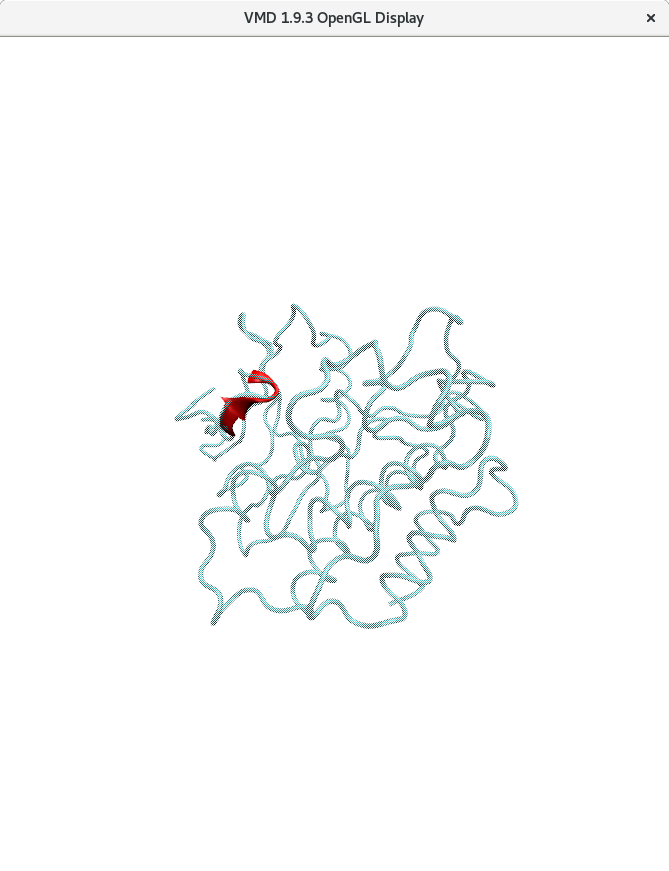

In [134]:
# Take residue 10, which has at least 40% T and 40% S
Image(filename='residue10_1.png')

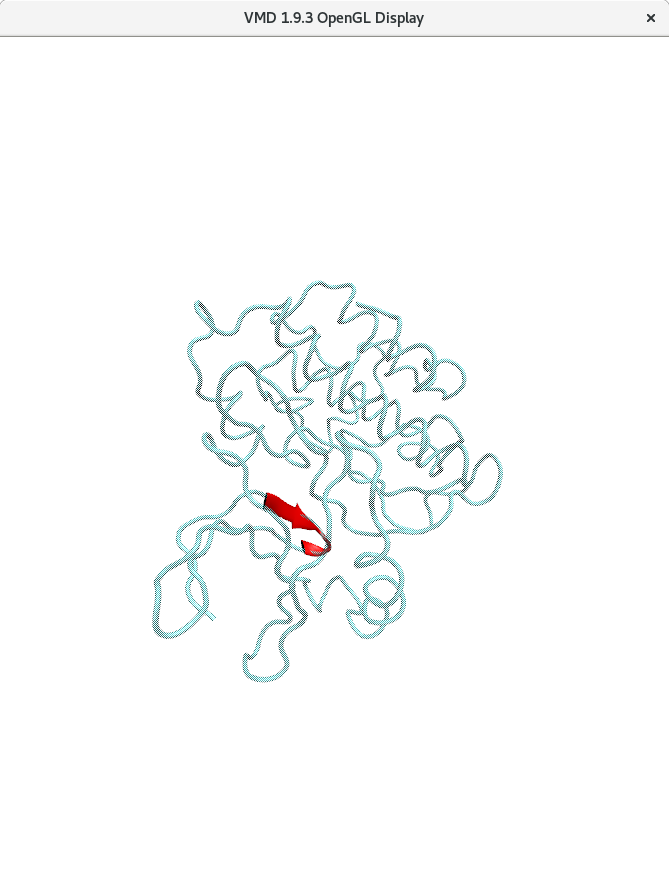

In [133]:
Image(filename='residue10_2.png')

In [33]:
#Find all the frames where a given residue is H or E
residue_number = 340
array_index = residue_number - 242
print(np.asarray(residue_num)[array_index])
helix_frames = np.where(dssp[:, array_index] == 'H')
beta_frames = np.where(dssp[:, array_index] == 'E')

print("Residue %s" % np.asarray(residue_num)[array_index])
print("helix_frames:", helix_frames)
print("helix_frames:", beta_frames)


340
Residue 340
helix_frames: (array([   0,    1,    2, ..., 3997, 3998, 3999]),)
helix_frames: (array([], dtype=int64),)


In [34]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [35]:
np.shape(phis[:, 0])


(4000,)

In [36]:
phi_dict = {}
dihedral_dict = {'phi': {}, 'psi': {}, 'chi1': {}, 'chi2': {}}

for i in range(0, len(indices_phi)):
    indices = indices_phi[i]
    atom = top.atom(indices[1])
    resnum = top.atom(indices[1]).residue.resSeq
    dihedral_dict['phi'][resnum] = phis[:, i]

for i in range(0, len(indices_psi)):
    indices = indices_psi[i]
    atom = top.atom(indices[1])
    resnum = top.atom(indices[1]).residue.resSeq
    dihedral_dict['psi'][resnum] = psis[:, i]

for i in range(0, len(indices_chi1)):
    indices = indices_chi1[i]
    atom = top.atom(indices[1])
    resnum = top.atom(indices[1]).residue.resSeq
    dihedral_dict['chi1'][resnum] = chi1s[:, i]

for i in range(0, len(indices_chi2)):
    indices = indices_chi2[i]
    atom = top.atom(indices[1])
    resnum = top.atom(indices[1]).residue.resSeq
    dihedral_dict['chi2'][resnum] = chi2s[:, i]


In [37]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [38]:
#Heres a function to plot a phi/psi ramachandran plot:
def plot_phipsi(res):
    plt.hist2d(dihedral_dict['phi'][res],
               dihedral_dict['psi'][res],
               bins=36,
               range=[[-3.14, 3.14], [-3.14, 3.14]],
               norm=colors.LogNorm(),
               cmap='jet')
    plt.xlabel('$\phi$', size=18)
    plt.ylabel('$\psi$', size=18)
    plt.xticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
    plt.yticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
    plt.tick_params(labelsize=18)
    plt.show()
    return


def plot_chi(res):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res], bins=36, range=[-3.14, 3.14])
        plt.xticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        plt.show()
        plt.clf()
    if res in dihedral_dict['chi2']:
        plt.hist2d(dihedral_dict['chi1'][res],
                   dihedral_dict['chi2'][res],
                   bins=36,
                   range=[[-3.14, 3.14], [-3.14, 3.14]],
                   norm=colors.LogNorm(),
                   cmap='jet')
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('$\chi_2$', size=18)
        plt.xticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
        plt.yticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
        plt.tick_params(labelsize=18)
        plt.show()
    return


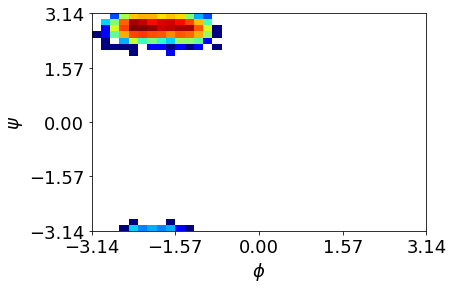

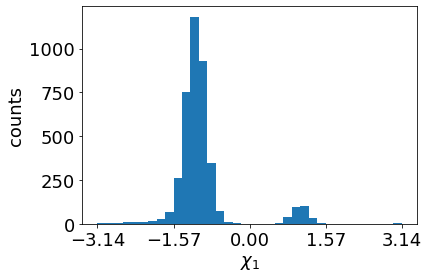

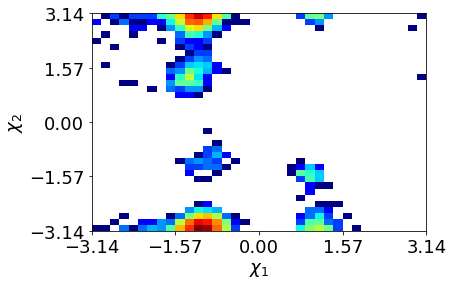

In [39]:
plot_phipsi(308)
plt.clf()
plot_chi(308)

In [40]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel = top.select('name CA')
resnames = []
resnums = []
for i in CA_sel:
    resnum = top.atom(i).residue.resSeq
    resnums.append(resnum)
    resname = top.atom(i).residue.name
    resnames.append(resname)

resnums = np.asarray(resnums)
resnames = np.asarray(resnames)
VAL_indices = np.where(resnames == 'VAL')
Val_resnums = resnums[VAL_indices]
Val_resnums

array([256, 260, 268, 270, 280, 289, 299, 304, 335, 338, 339, 371, 377,
       379, 422, 427, 448, 468])

Residue 256


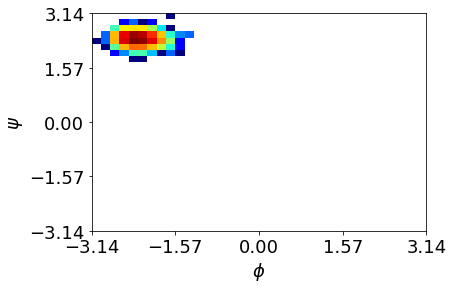

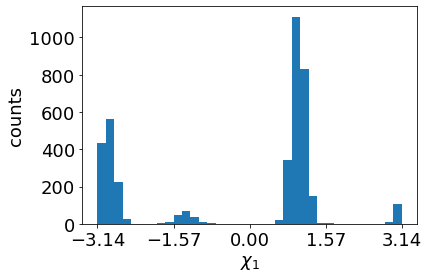

Residue 260


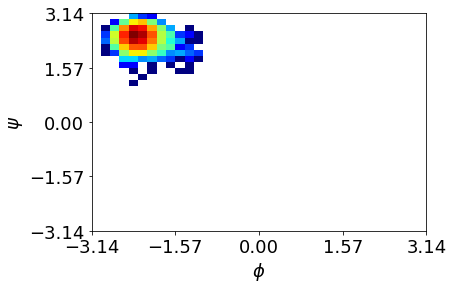

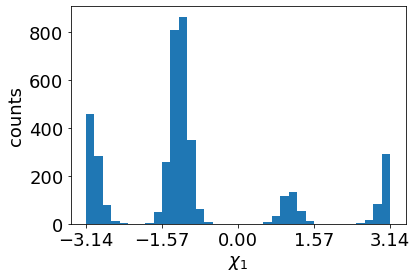

Residue 268


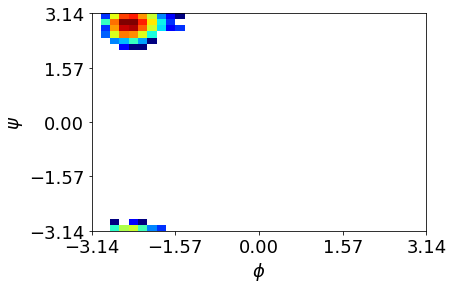

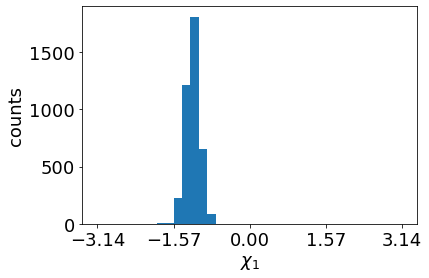

Residue 270


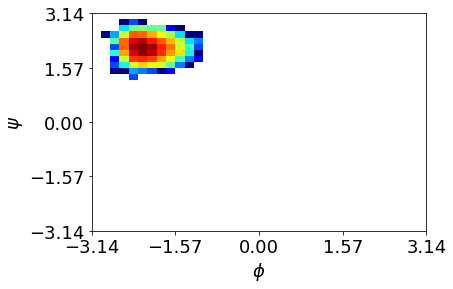

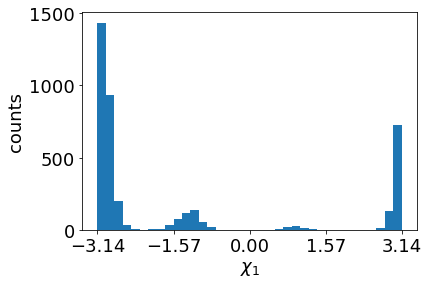

Residue 280


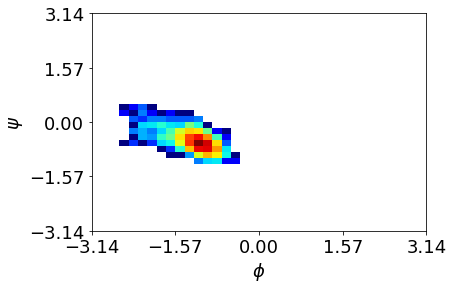

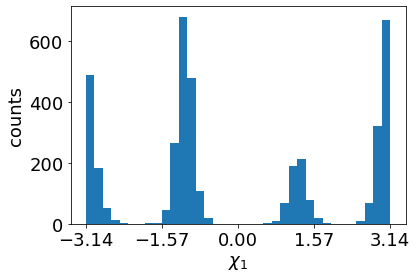

Residue 289


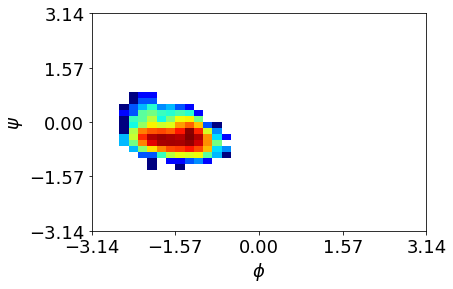

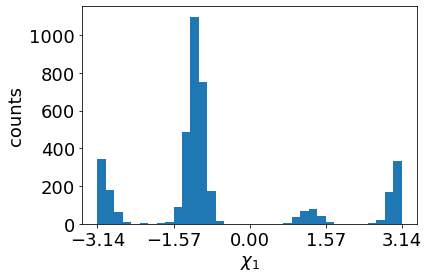

Residue 299


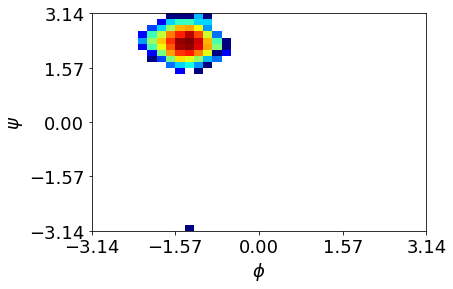

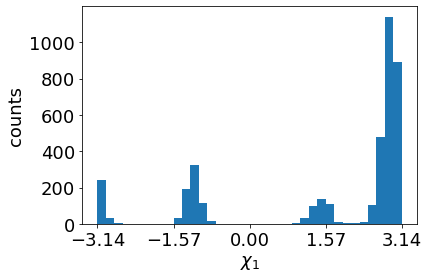

Residue 304


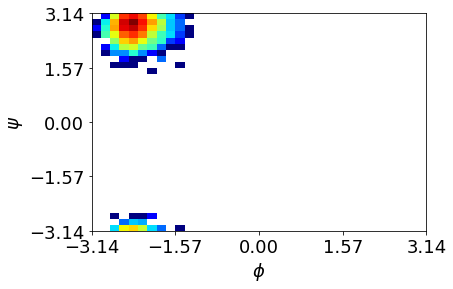

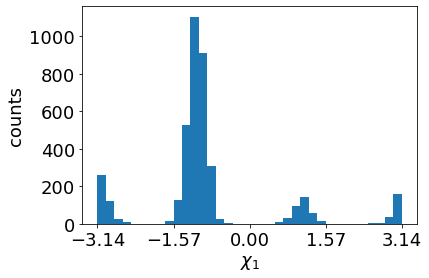

Residue 335


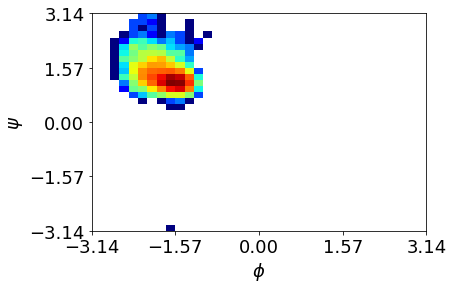

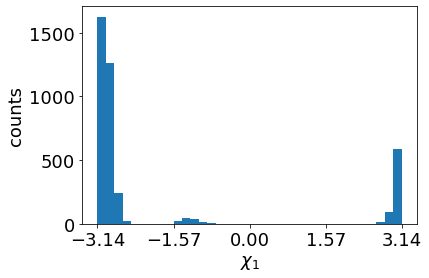

Residue 338


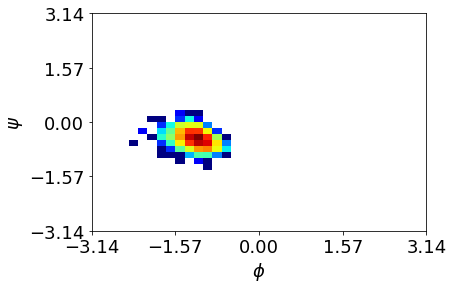

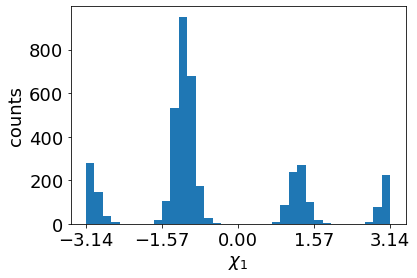

Residue 339


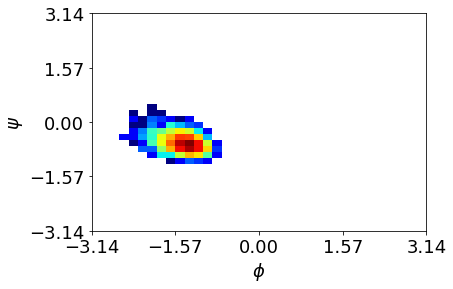

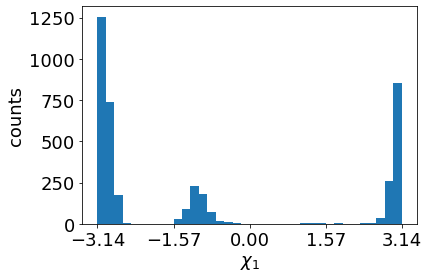

Residue 371


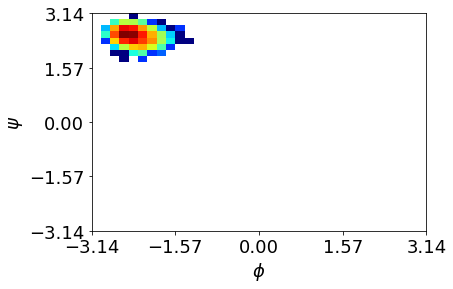

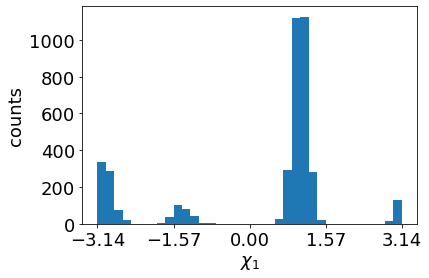

Residue 377


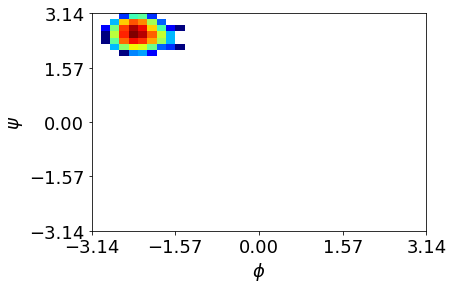

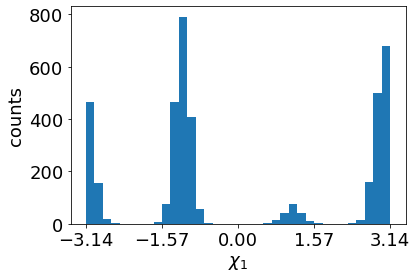

Residue 379


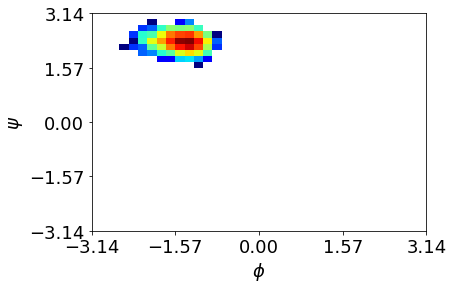

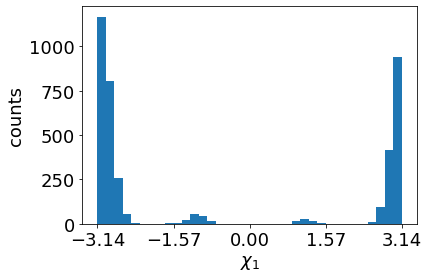

Residue 422


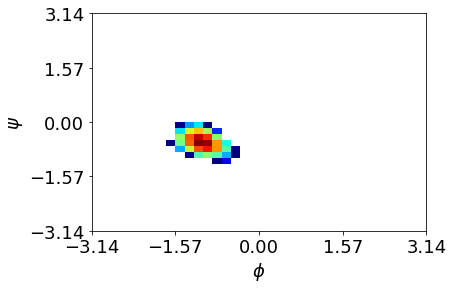

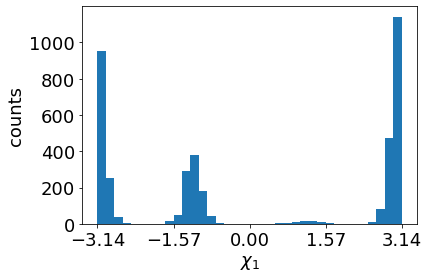

Residue 427


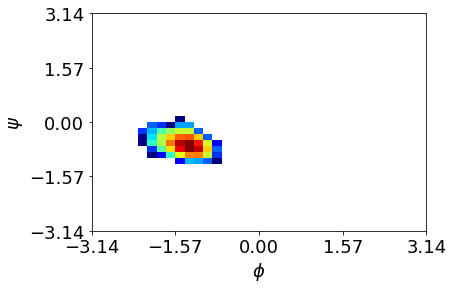

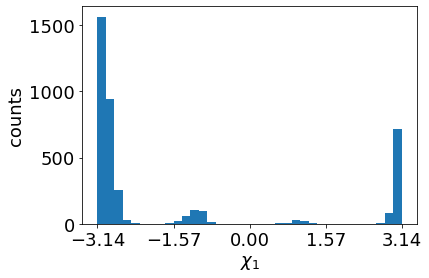

Residue 448


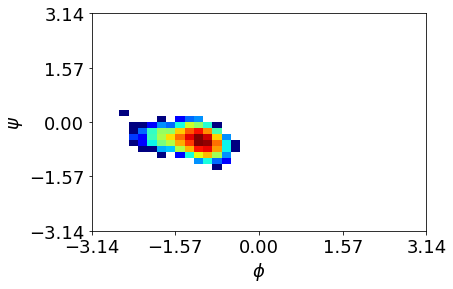

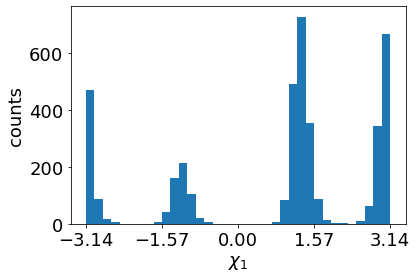

Residue 468


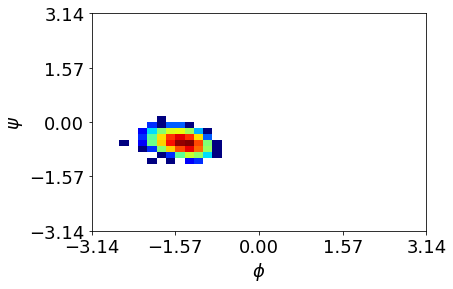

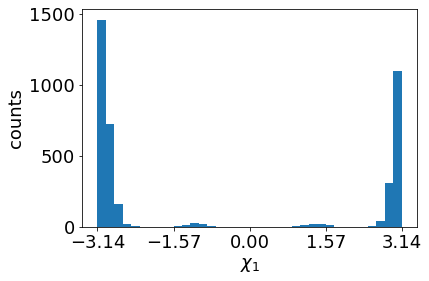

<Figure size 432x288 with 0 Axes>

In [41]:
for i in Val_resnums:
    print("Residue", i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

HOMEWORK Problem 3

Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations). Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation. Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot

In [141]:
# Homework 3
PHE_indices=np.where(resnames=='PHE')
PHE_resnums=resnums[PHE_indices]
PHE_resnums

array([283, 311, 317, 359, 382, 401, 416, 425, 486, 493])

Residue 283


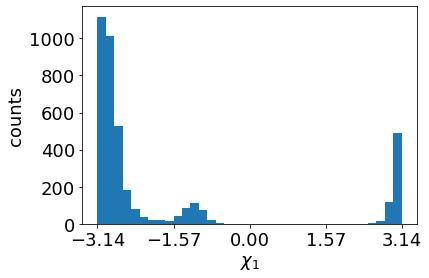

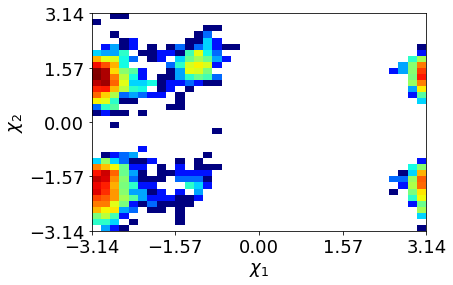

<Figure size 432x288 with 0 Axes>

In [147]:
# Let's take residue 283
i = PHE_resnums[0]
print("Residue",i)
plot_chi(i)
plt.clf()

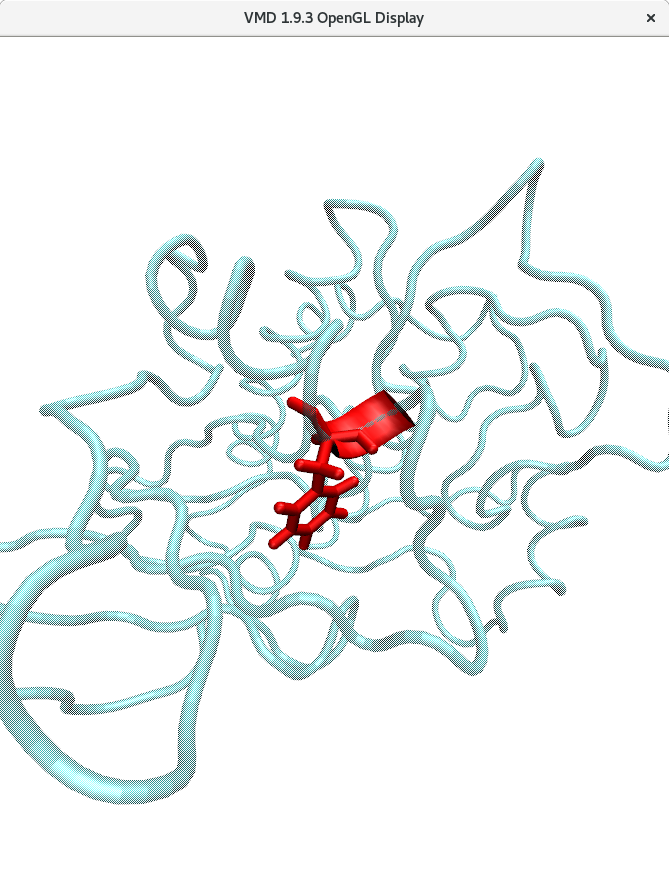

In [144]:
Image(filename='rotamer_1.png')

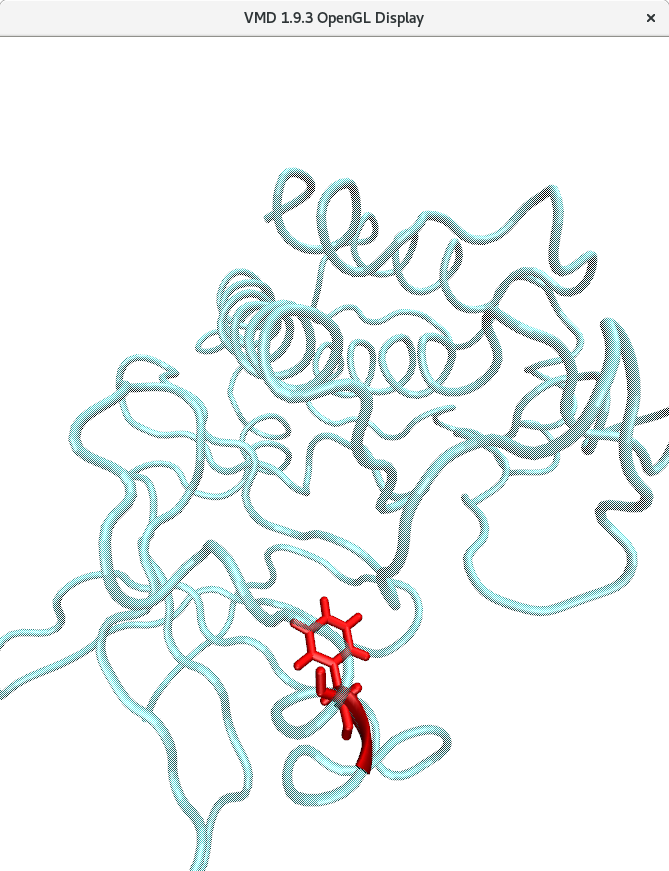

In [146]:
Image(filename='rotamer_2.png')

The first image is corresponded to the minimum where chi2 = -1.57, and the snapshot is taken at the beginning of the trajectory. Then it shifts to the minimum of chi2 = 1.57, which is more favorable. 

HOMEWORK Problem 4

Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations). Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation. Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot

In [161]:
# Homework 4
SER_indices=np.where(resnames=='SER')
SER_resnums=resnums[SER_indices]
SER_resnums

array([265, 348, 349, 385, 410, 417, 420, 438, 446, 481, 485])

Residue 265


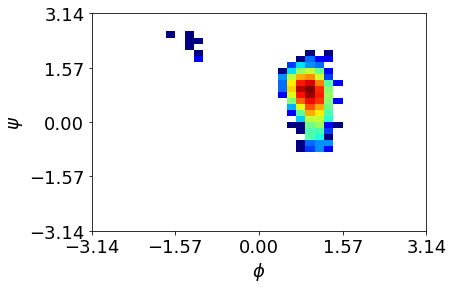

<Figure size 432x288 with 0 Axes>

In [162]:
# Let's take residue 265
i = SER_resnums[0]
print("Residue",i)
plot_phipsi(i)
plt.clf()

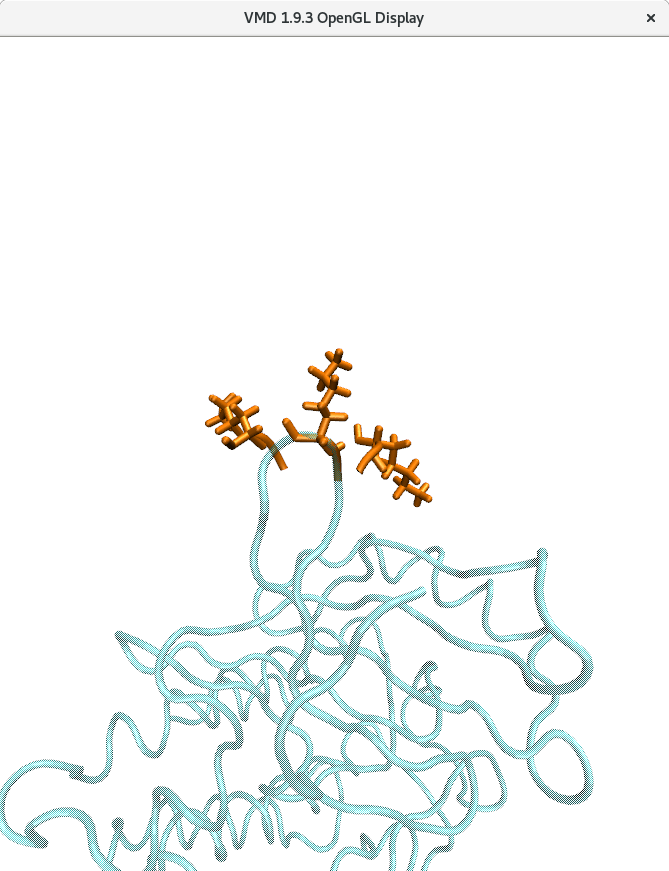

In [164]:
Image(filename='SER_phipsi.png')
# Snapshot is taken for frame 0, 2500 and 4000

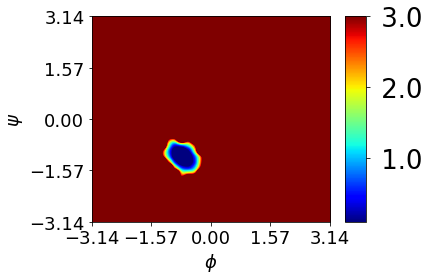

In [43]:
#Lets Make A Pretty Free Energy Plot


def plot_phipsi_FES(res):
    free_energy, xedges, yedges = np.histogram2d(
        dihedral_dict['phi'][res],
        dihedral_dict['psi'][res],
        36, [[-3.14, 3.14], [-3.14, 3.14]],
        normed=True,
        weights=None)
    free_energy = np.log(np.flipud(free_energy) + .000001)
    T = 300
    kbT = T * 0.008314 / 4.184  # kT in kcal/mol
    dG = -(kbT) * free_energy  #Convert to kcal/mol
    im = plt.imshow(dG,
                    interpolation='gaussian',
                    extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],
                    cmap='jet',
                    aspect='auto')
    cbar_ticks = [0, 1, 2, 3]
    cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                      aspect=10)  # grab the Colorbar instance
    imaxes = plt.gca()
    plt.xticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
    plt.yticks([-3.14, -3.14 / 2, 0, 3.14 / 2, 3.14], fontsize=35)
    plt.xlabel('$\phi$', size=18)
    plt.ylabel('$\psi$', size=18)
    plt.tick_params(labelsize=18)
    plt.axes(cb.ax)
    plt.clim(vmin=0.1, vmax=3.0)
    plt.yticks(size='26')
    plt.tight_layout()
    plt.show()
    return


plot_phipsi_FES(350)